<a href="https://colab.research.google.com/github/AbelEsther/CampusGuard-AI/blob/main/CampusGuard_AI_group6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://universe.roboflow.com/yolov7test-u13vc/weapon-detection-m7qso/dataset/16

#Project: CampusGuard-AI
## Team 6: Aishwarya Jadeja, Dhrushi Padma, Esther Abel, Haarika Atluri, Nayana Hegde


In [1]:
# github repo link : https://github.com/AbelEsther/CampusGuard-AI

In [2]:
# Mount Google Drive & Unzip Dataset
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

zip_path = '/content/drive/My Drive/content/weapon-detection.v16-remapped-train-80-val-20.yolov8.zip'
extract_dir = '/content/weapon_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

os.listdir(extract_dir)


Mounted at /content/drive


['README.roboflow.txt',
 'train',
 'export',
 'data.yaml',
 'valid',
 'README.dataset.txt']

In [3]:
# Install YOLOv8
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.2/984.2 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [4]:
# Create data.yaml
data_yaml = """
train: /content/weapon_dataset/train/images
val: /content/weapon_dataset/valid/images

nc: 2
names: ['gun', 'knife']
"""

with open('/content/weapon_dataset/data.yaml', 'w') as f:
    f.write(data_yaml)

In [5]:
# Train the YOLOv8 Model
from ultralytics import YOLO

model = YOLO('yolov8s.yaml')  # Or 'yolov8s.yaml' for better performance
model.train(data='/content/weapon_dataset/data.yaml', epochs=30, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.117 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/weapon_dataset/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half

100%|██████████| 755k/755k [00:00<00:00, 22.5MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

YOLOv8s summary: 129 layers, 11,136,374 parameters, 11,136,358 gradients, 28.6 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 95.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 17.8±7.2 MB/s, size: 34.6 KB)


train: Scanning /content/weapon_dataset/train/labels... 10900 images, 7 backgrounds, 13 corrupt: 100%|██████████| 10900/10900 [00:13<00:00, 789.27it/s]

train: /content/weapon_dataset/train/images/heavy_weapon-495-_jpg.rf.022325e0a5924c02545a5b9fbe412778.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
train: /content/weapon_dataset/train/images/heavy_weapon-495-_jpg.rf.8b4d4363ecea1564de76560d53c5eea3.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
train: /content/weapon_dataset/train/images/heavy_weapon-498-_jpg.rf.5999c267da9ea0f21ce4c74a20170988.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
train: /content/weapon_dataset/train/images/heavy_weapon-498-_jpg.rf.e8e55acdd07fbeefde5ba8243b03b0ad.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
train: /content/weapon_dataset/train/images/heavy_weapon-520-_jpg.rf.5dd5eaf127d2a2e85b3bbd93bb54253b.jpg: ignoring corrupt image/label: Label class 2 e

train: New cache created: /content/weapon_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 14.8±6.8 MB/s, size: 38.9 KB)


val: Scanning /content/weapon_dataset/valid/labels... 1491 images, 172 backgrounds, 195 corrupt: 100%|██████████| 1491/1491 [00:02<00:00, 741.64it/s]

val: /content/weapon_dataset/valid/images/NV_584-0050_jpg.rf.578abc28166b3acf3372a4552b4221c3.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: /content/weapon_dataset/valid/images/heavy_weapon-512-_jpg.rf.94cd16caa78129fb2d6ab9203edb26f7.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: /content/weapon_dataset/valid/images/rgb-000000_jpg.rf.2553ea4d6d3a230e78718f8842e39641.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: /content/weapon_dataset/valid/images/rgb-00000100_jpg.rf.c1792a7dd8245024ba168de9c22c2412.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: /content/weapon_dataset/valid/images/rgb-00000104_jpg.rf.b8b47c1232411a4bfcecca9d7e5c4448.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Pos

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.69G       2.65      3.298      3.275         17        640: 100%|██████████| 681/681 [03:42<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:14<00:00,  2.91it/s]

                   all       1296       1315      0.608      0.126     0.0823     0.0211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.49G      1.945      2.565      2.398         21        640: 100%|██████████| 681/681 [03:36<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.09it/s]


                   all       1296       1315      0.331      0.239      0.192     0.0673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.52G       1.77      2.349      2.194         15        640: 100%|██████████| 681/681 [03:34<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.12it/s]


                   all       1296       1315      0.373      0.313      0.298      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.57G      1.674      2.217      2.096         18        640: 100%|██████████| 681/681 [03:32<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.07it/s]


                   all       1296       1315      0.481      0.351      0.343      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       4.6G      1.592      2.094      2.006         19        640: 100%|██████████| 681/681 [03:33<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.11it/s]


                   all       1296       1315      0.592       0.35      0.383      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.63G       1.53       1.99      1.941         11        640: 100%|██████████| 681/681 [03:33<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.15it/s]


                   all       1296       1315      0.672      0.404      0.456      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.67G      1.488      1.918      1.902         16        640: 100%|██████████| 681/681 [03:32<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.08it/s]


                   all       1296       1315      0.765      0.389      0.457      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.71G      1.451      1.838       1.86         13        640: 100%|██████████| 681/681 [03:33<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.18it/s]


                   all       1296       1315      0.758      0.443      0.514      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.74G      1.419      1.788      1.828         25        640: 100%|██████████| 681/681 [03:32<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.13it/s]

                   all       1296       1315      0.758      0.462      0.519      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.78G      1.391      1.737      1.805         12        640: 100%|██████████| 681/681 [03:34<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.09it/s]


                   all       1296       1315      0.773      0.483      0.545      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.81G      1.367      1.686      1.775         21        640: 100%|██████████| 681/681 [03:33<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.12it/s]

                   all       1296       1315      0.822      0.464      0.562      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.85G      1.342      1.645      1.755         20        640: 100%|██████████| 681/681 [03:32<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.09it/s]


                   all       1296       1315      0.843      0.469      0.568      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.88G      1.333      1.613      1.733         14        640: 100%|██████████| 681/681 [03:35<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.09it/s]

                   all       1296       1315      0.797      0.494      0.584      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.92G      1.304      1.566      1.716         11        640: 100%|██████████| 681/681 [03:31<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.17it/s]

                   all       1296       1315      0.811      0.543      0.635      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.96G      1.292      1.534      1.703         15        640: 100%|██████████| 681/681 [03:31<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.12it/s]


                   all       1296       1315      0.814      0.542      0.606      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         5G      1.262      1.489      1.676         19        640: 100%|██████████| 681/681 [03:29<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.20it/s]


                   all       1296       1315      0.865      0.544      0.645      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.04G      1.254      1.464      1.672         15        640: 100%|██████████| 681/681 [03:27<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.28it/s]

                   all       1296       1315      0.842      0.543      0.655      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.07G      1.243      1.441      1.656         24        640: 100%|██████████| 681/681 [03:30<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.23it/s]

                   all       1296       1315       0.85      0.567      0.668      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       5.1G      1.223      1.402      1.637         26        640: 100%|██████████| 681/681 [03:30<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.09it/s]

                   all       1296       1315      0.835      0.573      0.672      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.14G      1.214      1.388      1.632         23        640: 100%|██████████| 681/681 [03:29<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.16it/s]

                   all       1296       1315      0.815      0.599      0.675      0.435


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.18G      1.192      1.135      1.674          7        640: 100%|██████████| 681/681 [03:25<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.17it/s]


                   all       1296       1315      0.867      0.593       0.71      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.21G      1.156       1.06      1.644          8        640: 100%|██████████| 681/681 [03:24<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.22it/s]


                   all       1296       1315      0.839      0.605      0.705      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.25G      1.125      1.017      1.615          7        640: 100%|██████████| 681/681 [03:23<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.17it/s]

                   all       1296       1315      0.857      0.607       0.71      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.29G      1.101     0.9762      1.595          7        640: 100%|██████████| 681/681 [03:23<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.21it/s]


                   all       1296       1315      0.893      0.595      0.718      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.32G      1.082     0.9495      1.574          8        640: 100%|██████████| 681/681 [03:22<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.18it/s]

                   all       1296       1315      0.892      0.628      0.733      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.36G      1.056     0.9067      1.553          8        640: 100%|██████████| 681/681 [03:23<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.21it/s]


                   all       1296       1315        0.9      0.625       0.74      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.39G      1.035     0.8847      1.533          9        640: 100%|██████████| 681/681 [03:20<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.22it/s]

                   all       1296       1315      0.884      0.637      0.747      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.43G      1.029     0.8614      1.531         13        640: 100%|██████████| 681/681 [03:20<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]

                   all       1296       1315      0.895      0.645      0.748      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.47G      1.005     0.8359      1.511          7        640: 100%|██████████| 681/681 [03:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.25it/s]


                   all       1296       1315      0.879      0.652      0.752      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.51G     0.9921     0.8195      1.497          8        640: 100%|██████████| 681/681 [03:19<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.26it/s]


                   all       1296       1315      0.907      0.635      0.755      0.521

30 epochs completed in 1.859 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.117 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:14<00:00,  2.82it/s]


                   all       1296       1315      0.908      0.634      0.754      0.521
                   gun        362        396      0.927       0.48      0.642      0.401
                 knife        778        919       0.89      0.788      0.867      0.641
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ebe2aefd250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [41]:
# Capture an Image with Webcam
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

photo_filename = take_photo()
print(f"📸 Photo saved as {photo_filename}")

<IPython.core.display.Javascript object>

📸 Photo saved as photo.jpg



image 1/1 /content/photo.jpg: 480x640 1 knife, 16.0ms
Speed: 2.1ms preprocess, 16.0ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2
🔫 Harmful Object detected in the image!


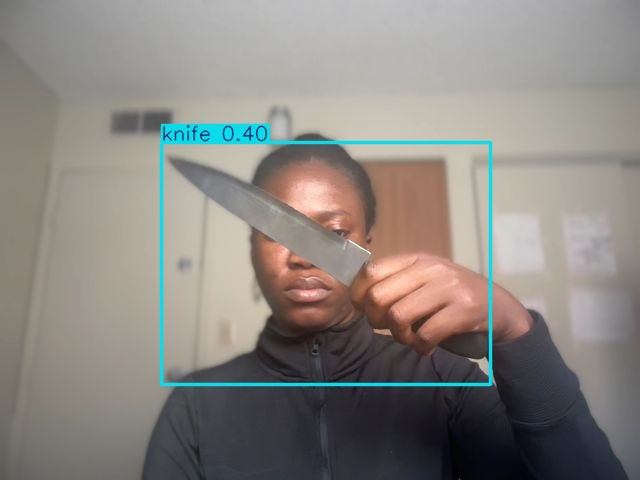

In [42]:
import shutil
from ultralytics import YOLO
from IPython.display import Image as ColabImage

# Load the trained YOLOv8 model
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

# ✅ Clean up previous predictions (optional but recommended)
shutil.rmtree('/content/runs/detect/predict2', ignore_errors=True)

# ✅ Run inference and save in custom folder
results = model(photo_filename, save=True, project='runs/detect', name='predict2', exist_ok=True)

# ✅ Check if any object was detected
boxes = results[0].boxes

if boxes is not None and len(boxes) > 0:
    print("🔫 Harmful Object detected in the image!")
else:
    print("✅ No Harmful Object detected in the image.")

# ✅ Show the saved result
ColabImage('/content/runs/detect/predict2/photo.jpg')
